In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage.util import random_noise
import statistics as stat

# 1 - Salt and pepper noise generation

Shape: (512, 512)


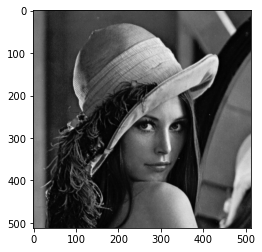

In [87]:
img = cv2.imread('images/lena_gray.tif', 0)

print('Shape:', img.shape)
plt.imshow(img, 'gray');

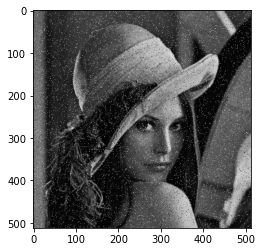

In [88]:
sp = random_noise(img, mode='s&p', seed=None, clip=True)
plt.imshow(sp, 'gray');

---

# 2 - Mean filtering

In [89]:
def filter_mean(img):
    M = np.ones(shape=(3,3))/9
    for i in range(img.shape[0] // 3):
        for j in range(img.shape[1] // 3):
            img[3*i:3*(i+1),3*j:3*(j+1)] = 
            np.matmul(M, img[3*i:3*(i+1),3*j:3*(j+1)])

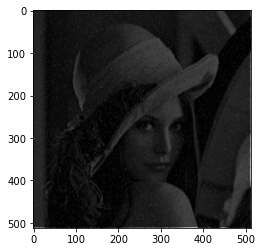

In [91]:
sp_copy = copy.deepcopy(sp)
filter_mean(sp_copy)
plt.imshow(sp_copy, 'gray');

---

# 3 - Median filtering

In [98]:
def filter_median(img):
    output = copy.deepcopy(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            M = []
            M.append(img[i-1][j-1])
            M.append(img[i-1][j])
            M.append(img[i-1][j+1])
            
            M.append(img[i][j-1])
            M.append(img[i][j])
            M.append(img[i][j+1])
            
            M.append(img[i+1][j-1])
            M.append(img[i+1][j])
            M.append(img[i+1][j+1])
            
            output[i][j] = stat.median(M)
    return output

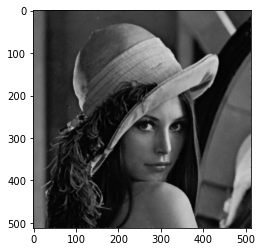

In [102]:
output = filter_median(sp)
plt.imshow(output, 'gray');

---

# 4 - Gaussian filtering

In [ ]:
def filter_gaussion(img):
    pass

---

# 5 - Checking